In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import algo
import json

In [4]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
          "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"]


In [307]:
path = 'fl/'
params = {}
results = {}
models = {}
for r,d,f in os.walk(path):
    for file in f:
        if "params.json" in file:
            with open(r+'/'+file) as json_file:
                params[r] = json.load(json_file)
        elif "results.csv" in file:
            results[r] = pd.read_csv(r+'/'+file)
            it = []
            client = []
            model_filenames = []
            if 'Unnamed: 0' in results[r].keys():
                for k in results[r]['Unnamed: 0']:
                    it.append(k[k.find('i')+1:k.find('_')])
                    client.append(k[k.find('_')+1:k.find('.npy')])
                    model_filenames.append(k+'.npy')
                results[r]['it'] = it
                results[r]['client'] = client
                results[r]['file_name'] = model_filenames
                results[r].pop('Unnamed: 0')
        elif '.npy' in file:
            if r not in models:
                models[r] = {}
            models[r][file] = np.load(r+'/'+file)



In [308]:
len(results.keys())

270

# Outout DP

In [375]:
list_to_check = []
for i in results:
    j = i+'_'
    if 'ncl16_' in j and 'eps1_' in j and 'outDPlocalTrue' in j:
#     if 'eps1_' in j and 'lr0.001_iter200_reg0.0001_outDPlocalTrue' in j:
        
        list_to_check.append(i[:i.find('_eps')])
list_to_check

['fl/rs42_ncl16_fiter10_lr0.001_iter100_reg0.0001_outDPlocalTrue']

In [376]:
to_plot = {}
for f in list_to_check:
    iteration = 4
    clients = {}
    for i in results:
        j = i+'_'
    #     if 'ncl2_' in j and 'eps1000_' in j and 'outDPlocalTrue' in j:
        if f in j:
#             print(j)
            data = results[i]
    #         print(i)
    #         print(params[i]['outDP_local_epsilon'])
    #         print(data.loc[data['it']==iteration]['test_acc_out_DP'])
            if clients == {}:
                eps = []
                clients_list = list(data.loc[data['it']==iteration]['client'])
                if clients_list==[]:
                    clients_list = list(data.loc[data['it']==str(iteration)]['client'])
                    iteration = str(iteration)
                for c in clients_list:
                    clients[c] = []
                    clients[c+'_attack_acc'] = []
            for c in clients_list:
                if c=='g':
                    clients[c].append(data.loc[data['it']==iteration].loc[data['client']==c]['test_acc'].item())
                else:
                    clients[c].append(data.loc[data['it']==iteration].loc[data['client']==c]['test_acc_out_DP'].item())
                clients[c+'_attack_acc'].append(data.loc[data['it']==iteration].loc[data['client']==c]['attack_acc_mean'].item())        
            eps.append(params[i]['outDP_local_epsilon'])

    clients['epsilon'] = eps
    df = pd.DataFrame.from_dict(clients)
    df = df.sort_values(by=['epsilon'])
    to_plot[f] = df

In [377]:
mean_nodes_data = {}
for f in to_plot:
    df = to_plot[f]
    data = to_plot[f]
    nodes_number = int((len(data.columns) - 3 )/2)
    nodes_test = [i for i in data.columns if 'attack_acc' not in i and 'g' not in i and 'epsilon' not in i]
    nodes_attack = [i for i in data.columns if 'attack_acc' in i and 'g' not in i]

    data['nodes_test_mean'] = data[nodes_test].mean(axis=1)
    data['nodes_test_std'] = data[nodes_test].std(axis=1)
    data['nodes_attack_mean'] = data[nodes_attack].mean(axis=1)
    data['nodes_attack_std'] = data[nodes_attack].std(axis=1)
    mean_nodes_data[f] = data

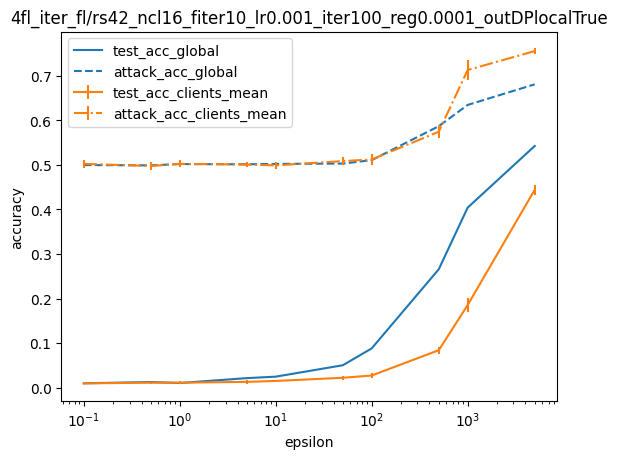

In [378]:
for f in mean_nodes_data:
    data = mean_nodes_data[f]
    plt.figure()
    plt.plot(data['epsilon'], data['g'], label = 'test_acc_global', color=colors[0])
    plt.plot(data['epsilon'], data['g_attack_acc'], '--', label = 'attack_acc_global', color=colors[0])
    plt.errorbar(data['epsilon'], data['nodes_test_mean'], data['nodes_test_std'],  label = 'test_acc_clients_mean', color=colors[1])
    plt.errorbar(data['epsilon'], data['nodes_attack_mean'], data['nodes_attack_std'], label = 'attack_acc_clients_mean', color=colors[1], ls='-.')
    plt.legend()
    plt.xscale('log')
    plt.title(str(iteration)+'fl_iter_'+f)
    plt.xlabel('epsilon')
    plt.ylabel('accuracy')   
    # plt.savefig('figures/outputDP_train_test_lambda_epsilon1.png')

In [190]:
# for f in to_plot:
#     df = to_plot[f]
# #     print(df)
#     plt.figure()
#     for i, c in enumerate(clients_list):
#         plt.plot(df['epsilon'], df[c], label = 'test_acc_'+c, color=colors[i])
#         plt.plot(df['epsilon'], df[c+'_attack_acc'], '--', label = 'attack_acc_'+c, color=colors[i])
#     plt.legend()
#     plt.xscale('log')
#     plt.title(str(iteration)+'fl_iter_'+f)
#     plt.xlabel('epsilon')
#     plt.ylabel('accuracy')   
#     # plt.savefig('figures/outputDP_train_test_lambda_epsilon1.png')

# DP SGD

In [379]:
list_to_check = []
for i in results:
    j = i+'_'
    if 'ncl16_' in j and 'eps50_' in j and 'sgdDPTrue' in j:
        
        list_to_check.append(i[:i.find('_eps')])
list_to_check

# fl/rs42_ncl2_fiter5_lr0.001_iter500_reg1e-05_sgdDPTrue_eps1000000_L10_C2
# 0.5428
# fl/rs42_ncl2_fiter5_lr0.001_iter500_reg0.0001_sgdDPTrue_eps1000000_L10_C2
# 0.5404
# fl/rs42_ncl2_fiter5_lr0.01_iter200_reg1e-05_sgdDPTrue_eps1000000_L20_C2
# 0.5423
# fl/rs42_ncl2_fiter5_lr0.01_iter200_reg0.0001_sgdDPTrue_eps1000000_L20_C2
# 0.5406
# fl/rs42_ncl2_fiter5_lr0.01_iter100_reg1e-05_sgdDPTrue_eps1000000_L20_C2
# 0.5389
# fl/rs42_ncl2_fiter5_lr0.01_iter100_reg0.0001_sgdDPTrue_eps1000000_L20_C2
# 0.5378



['fl/rs42_ncl16_fiter5_lr0.01_iter100_reg0.0001_sgdDPTrue']

In [341]:
to_plot = {}
for f in list_to_check:
    iteration = 4
    clients = {}
    for i in results:
        if f in i:
            data = results[i]
    #         print(i)
    #         print(params[i]['outDP_local_epsilon'])
    #         print(data.loc[data['it']==iteration]['test_acc_out_DP'])
            if clients == {}:
                eps = []
                clients_list = list(data.loc[data['it']==iteration]['client'])
                for c in clients_list:
                    clients[c] = []
                    clients[c+'_attack_acc'] = []
            for c in clients_list:
                clients[c].append(data.loc[data['it']==iteration].loc[data['client']==c]['test_acc'].item())
                clients[c+'_attack_acc'].append(data.loc[data['it']==iteration].loc[data['client']==c]['attack_acc_mean'].item())        
            eps.append(params[i]['epsilon'])
    clients['epsilon'] = eps
#     print(clients)
    df = pd.DataFrame.from_dict(clients)
    df = df.sort_values(by=['epsilon'])
    to_plot[f] = df

In [342]:
mean_nodes_data_dpsgd = {}
for f in to_plot:
    df = to_plot[f]
    data = to_plot[f]
    nodes_number = int((len(data.columns) - 3 )/2)
    nodes_test = [i for i in data.columns if 'attack_acc' not in i and 'g' not in i and 'epsilon' not in i]
    nodes_attack = [i for i in data.columns if 'attack_acc' in i and 'g' not in i]

    data['nodes_test_mean'] = data[nodes_test].mean(axis=1)
    data['nodes_test_std'] = data[nodes_test].std(axis=1)
    data['nodes_attack_mean'] = data[nodes_attack].mean(axis=1)
    data['nodes_attack_std'] = data[nodes_attack].std(axis=1)
    mean_nodes_data_dpsgd[f] = data

In [343]:
# for f in to_plot:
#     df = to_plot[f]
# #     print(df)
#     plt.figure()
#     for i, c in enumerate(clients_list):
#         plt.plot(df['epsilon'], df[c], label = 'test_acc_'+c, color=colors[i])
#         plt.plot(df['epsilon'], df[c+'_attack_acc'], '--', label = 'attack_acc_'+c, color=colors[i])
#     plt.legend()
#     plt.xscale('log')
#     plt.title(str(iteration)+'fl_iter_'+f)
#     plt.xlabel('epsilon')
#     plt.ylabel('accuracy')   
#     # plt.savefig('figures/outputDP_train_test_lambda_epsilon1.png')

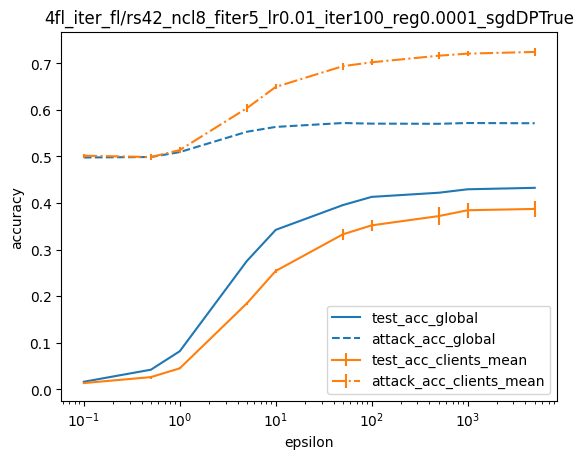

In [344]:
for f in mean_nodes_data_dpsgd:
    data = mean_nodes_data_dpsgd[f]
    plt.figure()
    plt.plot(data['epsilon'], data['g'], label = 'test_acc_global', color=colors[0])
    plt.plot(data['epsilon'], data['g_attack_acc'], '--', label = 'attack_acc_global', color=colors[0])
    plt.errorbar(data['epsilon'], data['nodes_test_mean'], data['nodes_test_std'],  label = 'test_acc_clients_mean', color=colors[1])
    plt.errorbar(data['epsilon'], data['nodes_attack_mean'], data['nodes_attack_std'], label = 'attack_acc_clients_mean', color=colors[1], ls='-.')
    plt.legend()
    plt.xscale('log')
    plt.title(str(iteration)+'fl_iter_'+f)
    plt.xlabel('epsilon')
    plt.ylabel('accuracy')   
    # plt.savefig('figures/outputDP_train_test_lambda_epsilon1.png')

# Output DP

In [260]:
list_to_check = []
for i in results:
    j = i+'_'
    if 'ncl4_' in j and 'eps10_' in j and 'outDPlocalTrue' in j:
        
        list_to_check.append(i[:i.find('_eps')])
list_to_check

['fl/rs42_ncl4_fiter10_lr0.001_iter100_reg0.0001_outDPlocalTrue']

In [261]:
to_plot = {}
for f in list_to_check:
    iteration = 0
    clients = {}
    for i in results:
        if f in i:
            data = results[i]
    #         print(i)
    #         print(params[i]['outDP_local_epsilon'])
    #         print(data.loc[data['it']==iteration]['test_acc_out_DP'])
            if clients == {}:
                eps = []
                clients_list = list(data.loc[data['it']==iteration]['client'])
                for c in clients_list:
                    clients[c] = []
                    clients[c+'_attack_acc'] = []
            for c in clients_list:
                clients[c].append(data.loc[data['it']==iteration].loc[data['client']==c]['test_acc'].item())
                clients[c+'_attack_acc'].append(data.loc[data['it']==iteration].loc[data['client']==c]['attack_acc_mean'].item())        
            eps.append(params[i]['epsilon'])
    clients['epsilon'] = eps
#     print(clients)
    df = pd.DataFrame.from_dict(clients)
    df = df.sort_values(by=['epsilon'])
    to_plot[f] = df

In [262]:
mean_nodes_data_dpsgd = {}
for f in to_plot:
    df = to_plot[f]
    data = to_plot[f]
    nodes_number = int((len(data.columns) - 3 )/2)
    nodes_test = [i for i in data.columns if 'attack_acc' not in i and 'g' not in i and 'epsilon' not in i]
    nodes_attack = [i for i in data.columns if 'attack_acc' in i and 'g' not in i]

    data['nodes_test_mean'] = data[nodes_test].mean(axis=1)
    data['nodes_test_std'] = data[nodes_test].std(axis=1)
    data['nodes_attack_mean'] = data[nodes_attack].mean(axis=1)
    data['nodes_attack_std'] = data[nodes_attack].std(axis=1)
    mean_nodes_data_dpsgd[f] = data

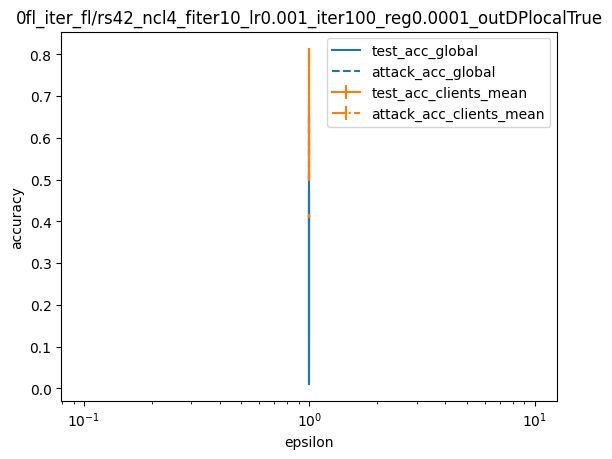

In [263]:
for f in mean_nodes_data_dpsgd:
    data = mean_nodes_data_dpsgd[f]
    plt.figure()
    plt.plot(data['epsilon'], data['g'], label = 'test_acc_global', color=colors[0])
    plt.plot(data['epsilon'], data['g_attack_acc'], '--', label = 'attack_acc_global', color=colors[0])
    plt.errorbar(data['epsilon'], data['nodes_test_mean'], data['nodes_test_std'],  label = 'test_acc_clients_mean', color=colors[1])
    plt.errorbar(data['epsilon'], data['nodes_attack_mean'], data['nodes_attack_std'], label = 'attack_acc_clients_mean', color=colors[1], ls='-.')
    plt.legend()
    plt.xscale('log')
    plt.title(str(iteration)+'fl_iter_'+f)
    plt.xlabel('epsilon')
    plt.ylabel('accuracy')   
    # plt.savefig('figures/outputDP_train_test_lambda_epsilon1.png')

In [196]:
dp_sgd = mean_nodes_data_dpsgd['fl/rs42_ncl2_fiter5_lr0.01_iter100_reg0.0001_sgdDPTrue']
out_dp = mean_nodes_data['fl/rs42_ncl2_fiter5_lr0.001_iter100_reg0.0001_outDPlocalTrue']
no_dp = results['fl/rs42_ncl2_fiter5_lr0.001_iter50_reg0.0001']

In [182]:
dp_sgd['epsilon'] = dp_sgd['epsilon']*int(iteration+1)
out_dp['epsilon'] = out_dp['epsilon']*int(iteration+1)

In [183]:
# iteration = 
base = {}
base['clients_test_mean'] = np.mean(no_dp.loc[no_dp['it'] == iteration].loc[no_dp['client'] != 'g']['test_acc'])
base['clients_attack_mean'] = np.mean(no_dp.loc[no_dp['it'] == iteration].loc[no_dp['client'] != 'g']['attack_acc_mean'])
base['global_test'] = no_dp.loc[no_dp['it'] == iteration].loc[no_dp['client'] == 'g']['test_acc'].item()
base['global_attack'] = no_dp.loc[no_dp['it'] == iteration].loc[no_dp['client'] == 'g']['attack_acc_mean'].item()

base

{'clients_test_mean': 0.5336000000000001,
 'clients_attack_mean': 0.6641250000000001,
 'global_test': 0.5426,
 'global_attack': 0.6620166666666667}

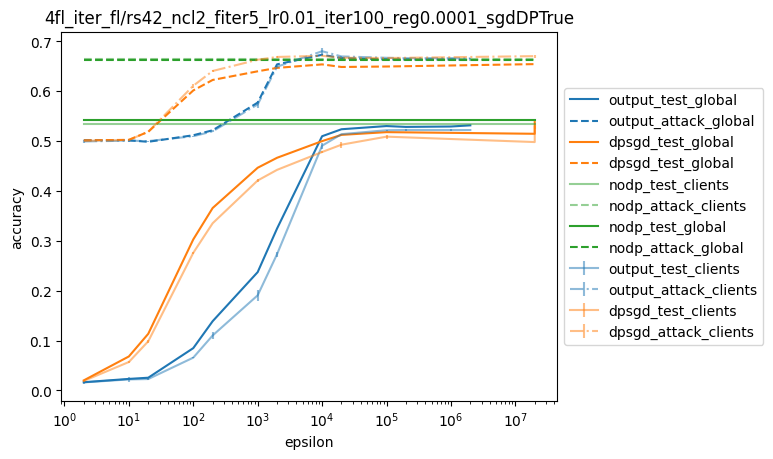

In [184]:
plt.figure()
plt.plot(out_dp['epsilon'], out_dp['g'], label = 'output_test_global', color=colors[0])
plt.plot(out_dp['epsilon'], out_dp['g_attack_acc'], '--', label = 'output_attack_global', color=colors[0])
plt.errorbar(out_dp['epsilon'], out_dp['nodes_test_mean'], out_dp['nodes_test_std'],  label = 'output_test_clients', color=colors[0], alpha=0.5)
plt.errorbar(out_dp['epsilon'], out_dp['nodes_attack_mean'], out_dp['nodes_attack_std'], label = 'output_attack_clients', color=colors[0], ls='-.', alpha=0.5)

plt.plot(dp_sgd['epsilon'], dp_sgd['g'], label = 'dpsgd_test_global', color=colors[1])
plt.plot(dp_sgd['epsilon'], dp_sgd['g_attack_acc'], '--', label = 'dpsgd_test_global', color=colors[1])
plt.errorbar(dp_sgd['epsilon'], dp_sgd['nodes_test_mean'], dp_sgd['nodes_test_std'],  label = 'dpsgd_test_clients', color=colors[1], alpha=0.5)
plt.errorbar(dp_sgd['epsilon'], dp_sgd['nodes_attack_mean'], dp_sgd['nodes_attack_std'], label = 'dpsgd_attack_clients', color=colors[1], ls='-.', alpha=0.5)

eps_min = min(min(dp_sgd['epsilon']),min(out_dp['epsilon']))
eps_max = max(max(dp_sgd['epsilon']),max(out_dp['epsilon']))

plt.plot([eps_min, eps_max], [base['clients_test_mean'],base['clients_test_mean']], label = 'nodp_test_clients', color=colors[2], alpha=0.5)
plt.plot([eps_min, eps_max], [base['clients_attack_mean'], base['clients_attack_mean']],'--', label = 'nodp_attack_clients', color=colors[2], alpha=0.5)
plt.plot([eps_min, eps_max], [base['global_test'],base['global_test']], label = 'nodp_test_global', color=colors[2], alpha=1)
plt.plot([eps_min, eps_max], [base['global_attack'], base['global_attack']],'--', label = 'nodp_attack_global', color=colors[2], alpha=1)


plt.legend()
plt.xscale('log')
plt.title(str(iteration)+'fl_iter_'+f)
plt.xlabel('epsilon')
plt.ylabel('accuracy')   
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('figures/2nodes_fl_iter'+str(iteration)+'DP_out_n_sgd.png')


# FL iterations


In [185]:
# dp_sgd_4iter = dp_sgd
# out_dp_4iter = out_dp


In [197]:
dp_sgd_0iter = dp_sgd
out_dp_0iter = out_dp


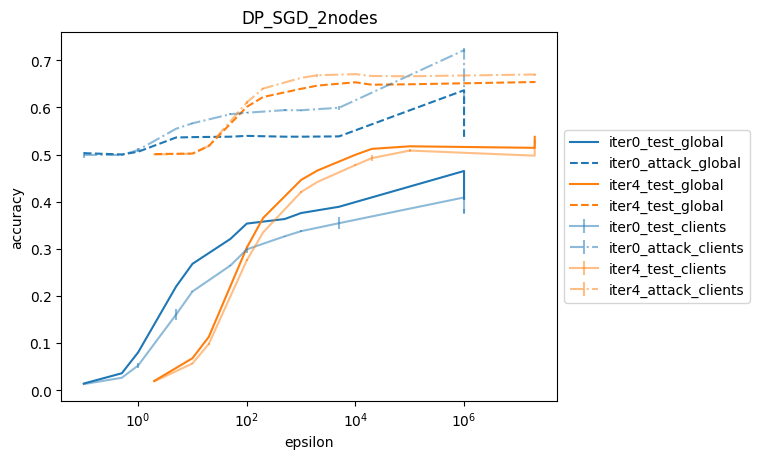

In [202]:
plt.figure()
plt.plot(dp_sgd_0iter['epsilon'], dp_sgd_0iter['g'], label = 'iter0_test_global', color=colors[0])
plt.plot(dp_sgd_0iter['epsilon'], dp_sgd_0iter['g_attack_acc'], '--', label = 'iter0_attack_global', color=colors[0])
plt.errorbar(dp_sgd_0iter['epsilon'], dp_sgd_0iter['nodes_test_mean'], dp_sgd_0iter['nodes_test_std'],  label = 'iter0_test_clients', color=colors[0], alpha=0.5)
plt.errorbar(dp_sgd_0iter['epsilon'], dp_sgd_0iter['nodes_attack_mean'], dp_sgd_0iter['nodes_attack_std'], label = 'iter0_attack_clients', color=colors[0], ls='-.', alpha=0.5)

plt.plot(dp_sgd_4iter['epsilon'], dp_sgd_4iter['g'], label = 'iter4_test_global', color=colors[1])
plt.plot(dp_sgd_4iter['epsilon'], dp_sgd_4iter['g_attack_acc'], '--', label = 'iter4_test_global', color=colors[1])
plt.errorbar(dp_sgd_4iter['epsilon'], dp_sgd_4iter['nodes_test_mean'], dp_sgd_4iter['nodes_test_std'],  label = 'iter4_test_clients', color=colors[1], alpha=0.5)
plt.errorbar(dp_sgd_4iter['epsilon'], dp_sgd_4iter['nodes_attack_mean'], dp_sgd_4iter['nodes_attack_std'], label = 'iter4_attack_clients', color=colors[1], ls='-.', alpha=0.5)

# eps_min = min(min(dp_sgd['epsilon']),min(out_dp['epsilon']))
# eps_max = max(max(dp_sgd['epsilon']),max(out_dp['epsilon']))

# plt.plot([eps_min, eps_max], [base['clients_test_mean'],base['clients_test_mean']], label = 'nodp_test_clients', color=colors[2], alpha=0.5)
# plt.plot([eps_min, eps_max], [base['clients_attack_mean'], base['clients_attack_mean']],'--', label = 'nodp_attack_clients', color=colors[2], alpha=0.5)
# plt.plot([eps_min, eps_max], [base['global_test'],base['global_test']], label = 'nodp_test_global', color=colors[2], alpha=1)
# plt.plot([eps_min, eps_max], [base['global_attack'], base['global_attack']],'--', label = 'nodp_attack_global', color=colors[2], alpha=1)

plt.legend()
plt.xscale('log')
plt.title('DP_SGD_2nodes')
plt.xlabel('epsilon')
plt.ylabel('accuracy')   
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('figures/2nodes_fl_iter'+str(iteration)+'DP_out_n_sgd.png')

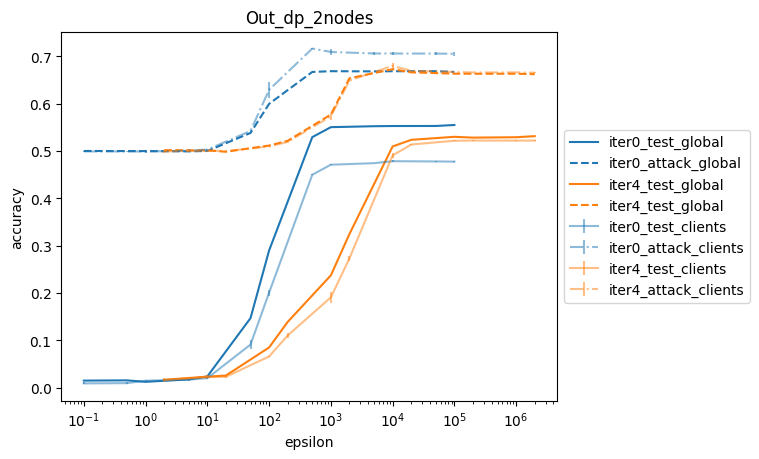

In [204]:
plt.figure()
plt.plot(out_dp_0iter['epsilon'], out_dp_0iter['g'], label = 'iter0_test_global', color=colors[0])
plt.plot(out_dp_0iter['epsilon'], out_dp_0iter['g_attack_acc'], '--', label = 'iter0_attack_global', color=colors[0])
plt.errorbar(out_dp_0iter['epsilon'], out_dp_0iter['nodes_test_mean'], out_dp_0iter['nodes_test_std'],  label = 'iter0_test_clients', color=colors[0], alpha=0.5)
plt.errorbar(out_dp_0iter['epsilon'], out_dp_0iter['nodes_attack_mean'], out_dp_0iter['nodes_attack_std'], label = 'iter0_attack_clients', color=colors[0], ls='-.', alpha=0.5)

plt.plot(out_dp_4iter['epsilon'], out_dp_4iter['g'], label = 'iter4_test_global', color=colors[1])
plt.plot(out_dp_4iter['epsilon'], out_dp_4iter['g_attack_acc'], '--', label = 'iter4_test_global', color=colors[1])
plt.errorbar(out_dp_4iter['epsilon'], out_dp_4iter['nodes_test_mean'], out_dp_4iter['nodes_test_std'],  label = 'iter4_test_clients', color=colors[1], alpha=0.5)
plt.errorbar(out_dp_4iter['epsilon'], out_dp_4iter['nodes_attack_mean'], out_dp_4iter['nodes_attack_std'], label = 'iter4_attack_clients', color=colors[1], ls='-.', alpha=0.5)

# eps_min = min(min(out_dp['epsilon']),min(out_dp['epsilon']))
# eps_max = max(max(out_dp['epsilon']),max(out_dp['epsilon']))

# plt.plot([eps_min, eps_max], [base['clients_test_mean'],base['clients_test_mean']], label = 'nodp_test_clients', color=colors[2], alpha=0.5)
# plt.plot([eps_min, eps_max], [base['clients_attack_mean'], base['clients_attack_mean']],'--', label = 'nodp_attack_clients', color=colors[2], alpha=0.5)
# plt.plot([eps_min, eps_max], [base['global_test'],base['global_test']], label = 'nodp_test_global', color=colors[2], alpha=1)
# plt.plot([eps_min, eps_max], [base['global_attack'], base['global_attack']],'--', label = 'nodp_attack_global', color=colors[2], alpha=1)

plt.legend()
plt.xscale('log')
plt.title('Out_dp_2nodes')
plt.xlabel('epsilon')
plt.ylabel('accuracy')   
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('figures/2nodes_fl_iter'+str(iteration)+'DP_out_n_sgd.png')